In [2]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
√ ggplot2 3.3.3     √ purrr   0.3.4
√ tibble  3.1.0     √ dplyr   1.0.5
√ tidyr   1.1.3     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
#사용자 함수
mymax <- function(x, y){
    num.max <- x
    if(y > x){
        num.max <- y
    }
    return(num.max)
}
mymax(10, 15)

[1] 15

In [4]:
mymax(20, 15)

[1] 20

#### default Value

In [5]:
mydiv <- function(x, y=2){
    result <- x/y
    return(result)
}

In [6]:
mydiv(x=10, y=3)

[1] 3.333333

In [7]:
mydiv(10, 3)

[1] 3.333333

In [8]:
mydiv(10)

[1] 5

#### 함수 다중 리턴값 예제

In [9]:
myfunc <- function(x,y){
    val.sum <- x + y
    val.mul <- x * y
    return(list(sum=val.sum, mul =val.mul))
}
result <- myfunc(5, 8)
result$sum

[1] 13

In [10]:
result$mul

[1] 40

함수 내의 변수(지역변수)를 전역변수로 설정하기 <br>
**<-** 가 아닌 **<<-** 를 사용하면 됨!

In [11]:
a <- 1:10
b <- 10:50 # a 벡터와 b 벡터를 생성

a_sum <- 0
b_sum <- 0

vec_sum <- function(values){
    return_sum <- 0
    for(value in values){
        return_sum <- return_sum + value
        print(return_sum)
    }
    return(return_sum)
}

a_sum2 <- vec_sum(a)
# b_sum2 <- vec_sum(b)

a_sum2

[1] 1
[1] 3
[1] 6
[1] 10
[1] 15
[1] 21
[1] 28
[1] 36
[1] 45
[1] 55


[1] 55

### 결측값 처리
- 함수의 속성 이용 : na.rm = T 를 사용하여, 함수 사용시 NA를 제외하고 수행한다.
<small>na.rm argument가 존재하는 함수가 제한적이다.</small>
- is.na() : NA인 데이터가 있으면 T, 없으면 F 를 반환 (시퀀스 지원)
- na.omit() : NA인 데이터를 지운다. !!NA가 포함된 행 전체를 지우기 때문에 주의 필요

In [12]:
library(data.table)
library(tidyverse)


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose



In [13]:
df <- read.table(file= "Pre_Season_Batter.csv" ,sep=",", header=TRUE)

In [14]:
nrow(df)

[1] 1393

In [15]:
table(is.na(df)) # 데이터를 확인하는 방법
sum(is.na(df)) # 파이썬 방식


FALSE  TRUE 
40314    83 

[1] 83

In [16]:
head(df, 5)

batter_id,batter_name,year,team,avg,G,AB,R,H,X2B,...,GDP,SLG,OBP,E,height.weight,year_born,position,career,starting_salary,OPS
0,가르시아,2018,LG,0.35,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),,0.959
1,강경학,2011,한화,0,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
1,강경학,2014,한화,-,4,0,2,0,0,...,0,NA,NA,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NA
1,강경학,2015,한화,0.13,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [20]:
table(is.na(df$SLG)) # DF$SLG ------> 장타율


FALSE  TRUE 
 1364    29 

In [21]:
table(is.na(df$DBP)) # DF$DBP ------> 출루율

< table of extent 0 >

In [22]:
table(is.na(df$E)) # DF$SLG ------> 실책 
# na값이 없다.


FALSE 
 1393 

In [24]:
table(is.na(df$'height/weight')) # DF$'height/weight' ------> 키 / 몸무게!
# < table of extent 0 > char 이기 때문에 뜬다.

< table of extent 0 >

In [31]:
mean(df$SLG) # NA가 존재, 결과도 NA!
mean(df$OBP)
mean(df$E)
# mean(df$'height/weight') #chr 형채

[1] NA

[1] NA

[1] 0.3819095

In [32]:
# mean에는 na.rm argument 가 존재!!
# 함수의 속성을 이용해서 결측값은 무시
mean(df$SLG, na.rm=T) # NA가 존재, 결과도 NA!
mean(df$OBP, na.rm=T)
mean(df$E)
# mean(df$'height/weight') #chr 형채

[1] 0.3610125

[1] 0.3179115

[1] 0.3819095

In [40]:
df_not_na_slg <- df[!is.na(df$SLG),]
nrow(df_not_na_slg)

[1] 1364

In [50]:
df_not_na_slg <- df[is.na(df$SLG) == F,]
nrow(df_not_na_slg)

[1] 1364

#### na.omit() -------> NA인 데이터를 지운다. 주의 NA가 포함된 행 전체를 지운다.

In [55]:
df_not_omit <- na.omit(df)

In [57]:
mean(df_not_omit$OBP) # NA가 있으면 해당 행을 다 지우기 때문에
# 데이터 분석에 있어서 쓰기 힘든 함수이다.

[1] 0.3159113

In [58]:
mean(df$OBP, na.rm =T)

[1] 0.3179115

In [62]:
df$SLG <- ifelse(is.na(df$SLG), 0 , df$SLG) # 결측값은 전부 0으로 치환

### 이상값 처리
- 모든 열의 4분의 수 구하기!!!<br>

In [71]:
summary(airquality) #  요약

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

In [72]:
quar <- summary(airquality)
str(quar)

 'table' chr [1:7, 1:6] "Min.   :  1.00  " "1st Qu.: 18.00  " ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:7] "" "" "" "" ...
  ..$ : chr [1:6] "    Ozone" "   Solar.R" "     Wind" "     Temp" ...


In [73]:
quar[, 1] # 첫번째 열, Ozone

"Min.   :  1.00  " "1st Qu.: 18.00  " "Median : 31.50  " "Mean   : 42.13  " 
                                                         
"3rd Qu.: 63.25  " "Max.   :168.00  "     "NA's   :37  "

[,1]
[1,]   1.0
[2,]  18.0
[3,]  31.5
[4,]  63.5
[5,] 122.0
attr(,"class")
        1 
"integer"

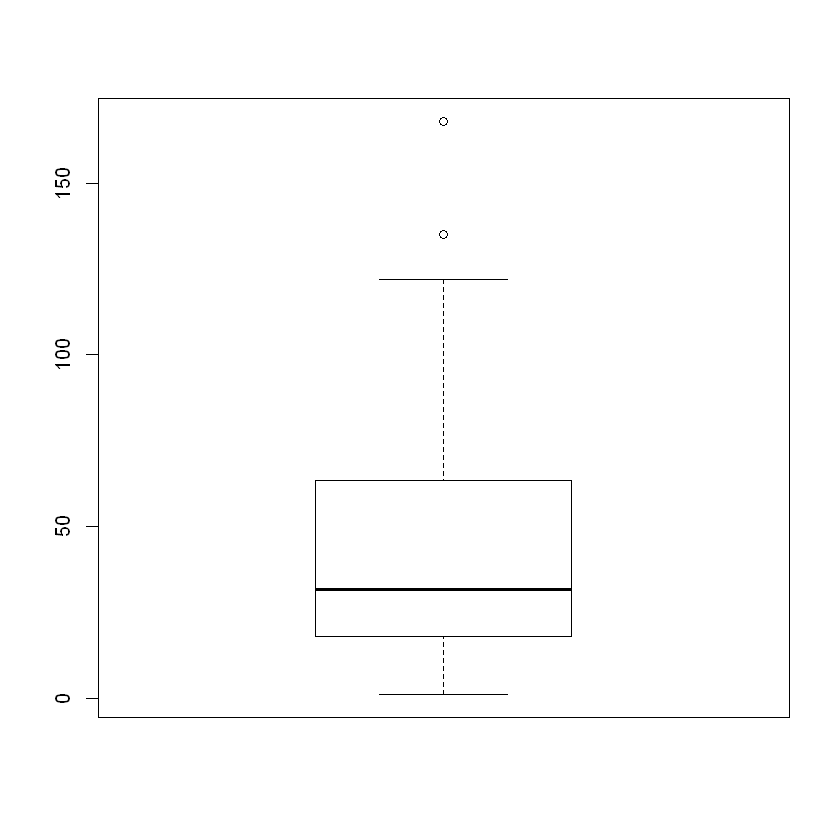

In [74]:
boxplot(airquality$Ozone)$stats

[,1]
[1,]   1.0
[2,]  18.0
[3,]  31.5
[4,]  63.5
[5,] 122.0
attr(,"class")
        1 
"integer"

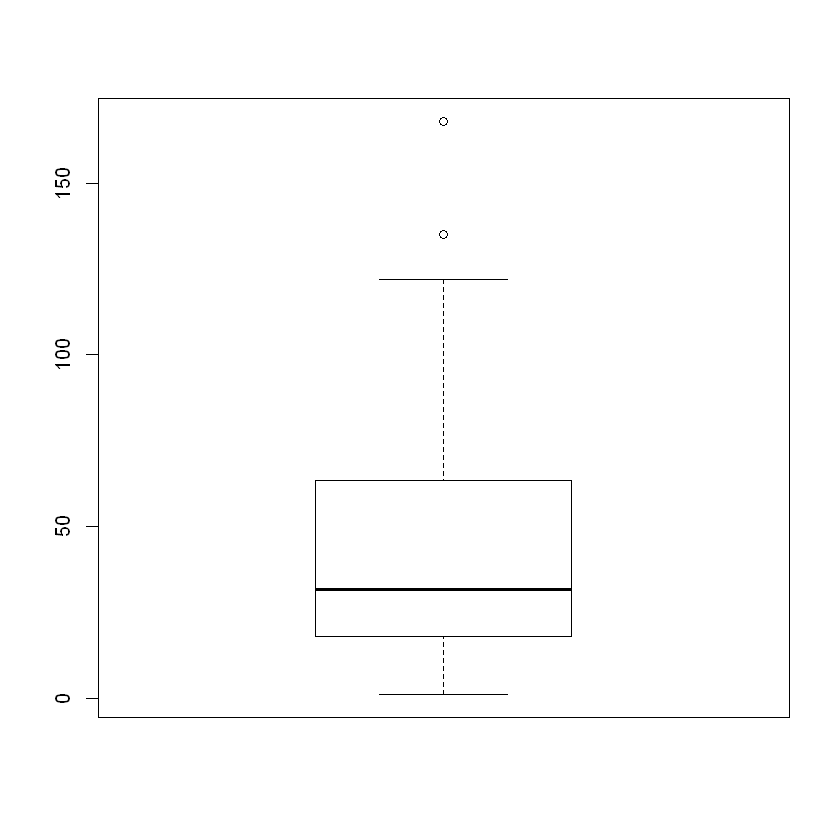

In [75]:
boxplot(airquality$Ozone)$stats

1.0,7,1.7,56
18.0,115,7.4,72
31.5,205,9.7,79
63.5,259,11.5,85
122.0,334,16.6,97


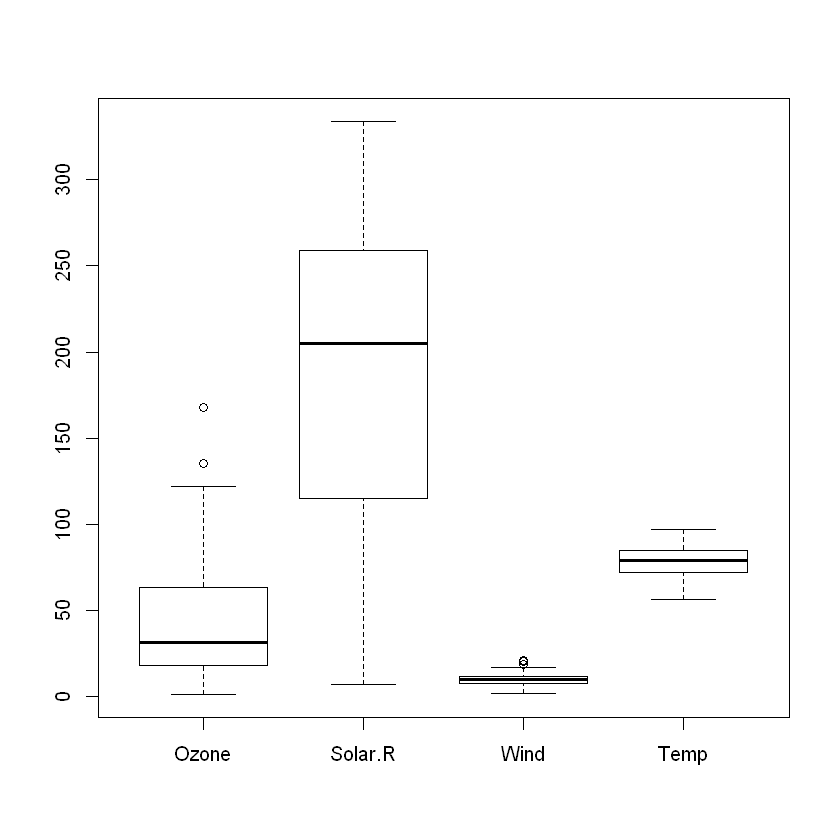

In [78]:
boxplot(airquality[,c(1:4)])$stats
#최소값, 1분위 값(25%), 중앙값, 3분위 값(75%), 최대값

In [80]:
# 3사분위 수에서  1사분위 수를 뺀 값을 IQR 이라고 한다.
IQR(airquality$Ozone, na.rm = T) # na 값이 있으면 계산이 안된다.

[1] 45.25

In [83]:
IQR(airquality$Day, na.rm = T)

[1] 15

In [84]:
df <- read.table(file="Pre_Season_Batter.csv" , sep = "," , header = TRUE)

In [85]:
summary(df)

   batter_id      batter_name        year           team          avg     
 Min.   :  0.0   박용택 :  17   Min.   :2002   두산   :186   0      :142  
 1st Qu.: 99.0   이진영 :  17   1st Qu.:2010   LG     :174   0.25   : 81  
 Median :178.0   정성훈 :  17   Median :2014   SK     :169   0.333  : 68  
 Mean   :173.4   김강민 :  16   Mean   :2013   롯데   :166   0.2    : 62  
 3rd Qu.:254.0   박한이 :  16   3rd Qu.:2017   삼성   :149   0.286  : 37  
 Max.   :344.0   이범호 :  16   Max.   :2018   KIA    :132   0.167  : 30  
                 (Other):1294                  (Other):417   (Other):973  
       G                 AB              R               H         
 Min.   :  1.000   Min.   :  0.0   Min.   : 0.00   Min.   : 0.000  
 1st Qu.:  6.000   1st Qu.:  9.0   1st Qu.: 1.00   1st Qu.: 2.000  
 Median :  9.000   Median : 18.0   Median : 2.00   Median : 4.000  
 Mean   :  8.706   Mean   : 19.2   Mean   : 2.68   Mean   : 5.022  
 3rd Qu.: 11.000   3rd Qu.: 28.0   3rd Qu.: 4.00   3rd Qu.: 8.000  
 Max.   :119.000

0.0000
0.2170
0.3445
0.4780
0.8640


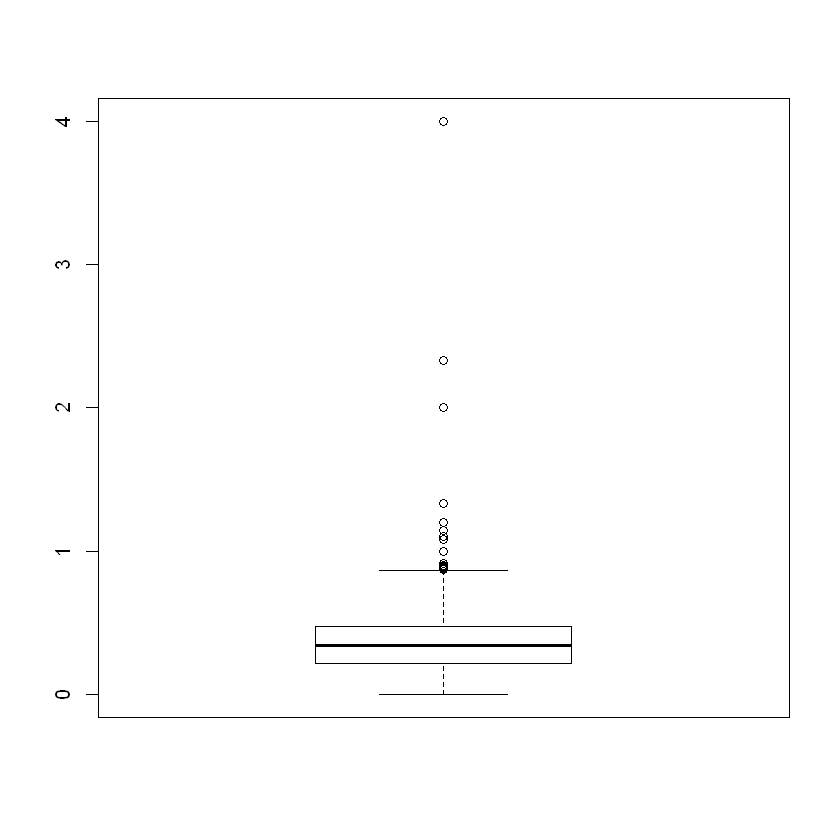

In [87]:
boxplot(df$SLG)$stats

0.063
0.250
0.333
0.400
0.625


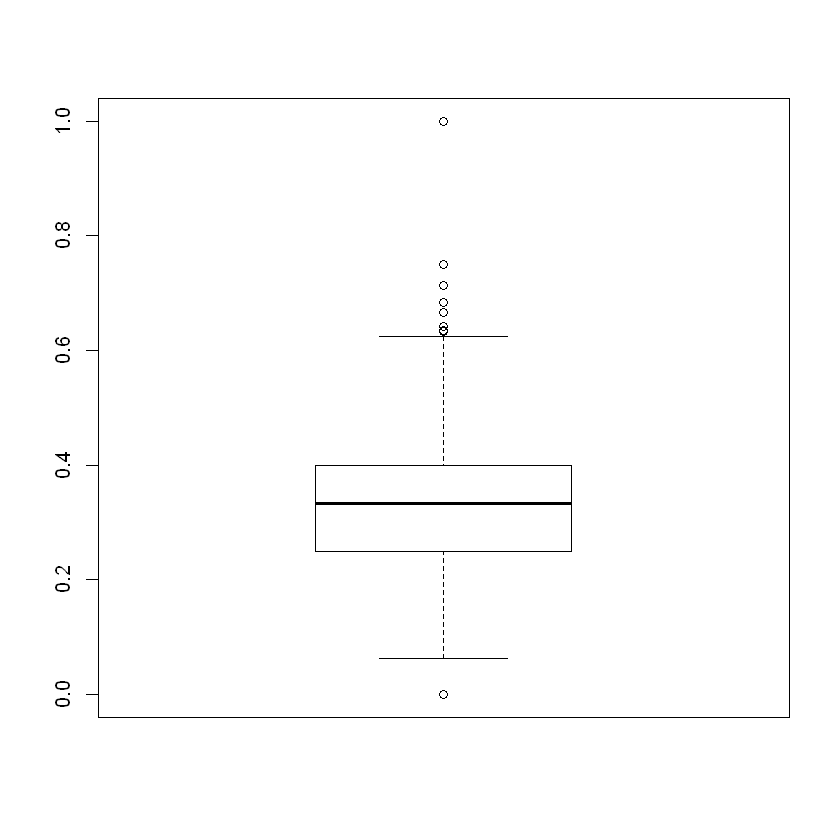

In [89]:
boxplot(df$OBP)$stats

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9]
[1,]    1    0    0    0    0    0    0    0    0
[2,]    6    9    1    2    0    0    0    2    0
[3,]    9   18    2    4    1    0    0    6    2
[4,]   11   28    4    8    2    0    1   11    4
[5,]   17   56    8   17    5    0    2   24   10
attr(,"class")
        G 
"integer"

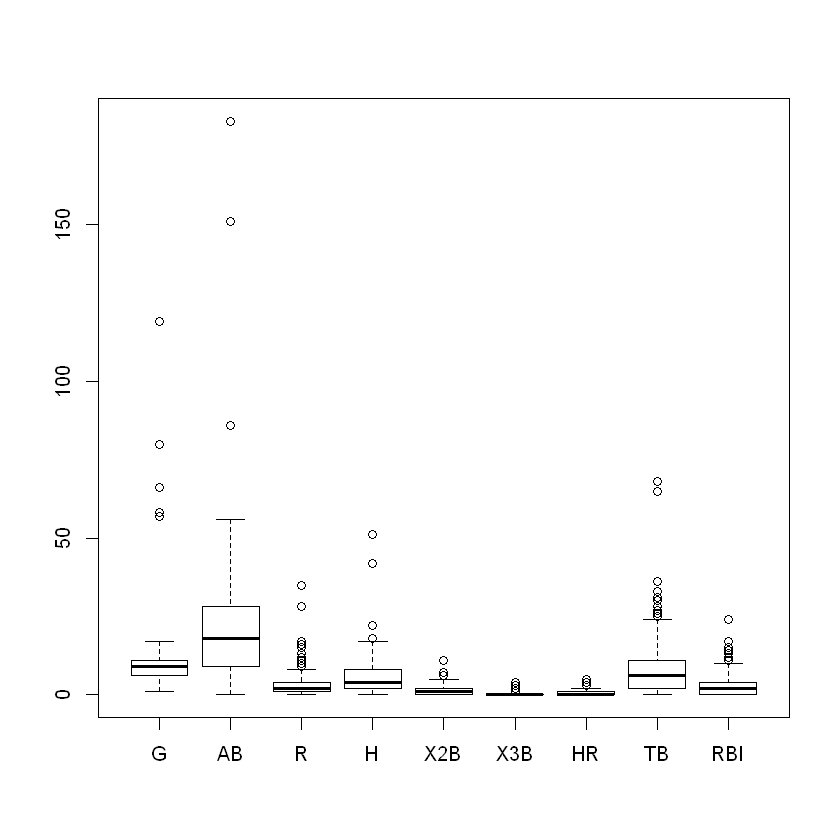

In [92]:
boxplot(df[,6:14])$stats

#### 모든 열의 IQR구하기!
 - IQR = Q3 - Q1
 - 하지만 우리는 이미 존재하는 함수, IQR를 이용한다.

In [98]:
IQRs <- function(df){
    iqrs <- lapply(X=df, function(col){
        return_value <- NULL
        if(class(col) !='character'){
        return_value <- IQR(col, na.rm = T)
    }else{
        return_value <- -999
    }
    return(return_value)
    })
    return(iqrs)
}

- what is lower and upper fence?
- The lower fence(LF) is the "lower limit" and the upper fence is the "upper limit"<br>
   of data, and any data lying outside this defined bouds can be considered and outlier(이상치).<br>
  LF = Q1 - 1.5 * IQR<br>
  UF = Q3 + 1.5 * IQR(이상치)
  

In [100]:
IQRs(df)  %>% bind_cols()

batter_id,batter_name,year,team,avg,G,AB,R,H,X2B,...,GDP,SLG,OBP,E,height.weight,year_born,position,career,starting_salary,OPS
155,103,7,5,86,5,19,3,6,2,...,1,0.261,0.15,1,82,99,5,119,22,0.395
